# Проект "Анализ оттока клиентов банка"

Содержание
1. [Материалы](#mat)
2. [Описание проекта](#desc)
3. [Изучение общей информации](#info)
4. [Предобработка данных](#pred)
5. [Исследовательский анализ данных](#analiz)
6. [Построение модели прогнозирования оттока клиентов (Дерево решений)](#model)
7. [Исследование признаков для формирования портрета клиентов, склонных к оттоку](#portrait)
8. [Кластеризация клиентов](#klast)
9. [Проверка гипотез](#hip)
10. [Общий вывод](#total)

<a id="mat"></a> 
## Материалы
[Презентация](https://cloud.mail.ru/public/v82z/ZHjrazAMe)
[Дашборд](https://public.tableau.com/views/Project_tableau_16570252824380/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

<a id="desc"></a> 
## Описание проекта

Итак, мы работаем в одном из крупнейших банков страны "Метанпромбанк". Неоходимо сделать анализ, который покажет, как клиенты пользуются нашими услугами, а так же поможет нам составить портрет клиентов, которые склонны уходить из банка.

**Цель исследования**: проанализировать клиентов регионального банка и выделить портрет клиентов, которые склонны уходить из банка.

**Задачи исследования**:
1) Построить модель прогнозирования оттока клиентов (дерево решений) и визуализировать ее;

2) Проанализировать основные признаки, наиболее сильно влияющие на отток;

2) Сформировать портрет клиентов, которые склонны уходить - выделить их основные черты;

4) Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
* предложить меры по снижению оттока;
* определить другие особенности взаимодействия с клиентами.


<a id="info"></a> 
## Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy import stats as st 
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')

In [4]:
df.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Итак, в таблице 10000 строк, 12 колонок. Датасет содержит данные о клиентах банка «Метанпром».
Согласно документации к данным:

* `userid` — идентификатор пользователя;
* `score` — баллы кредитного скоринга;
* `City` — город;
* `Gender` — пол;
* `Age` — возраст;
* `Objects` — количество объектов в собственности;
* `Balance` — баланс на счёте;
* `Products` — количество продуктов, которыми пользуется клиент;
* `CreditCard` — есть ли кредитная карта;
* `Loyalty` — активный клиент;
* `estimated_salary` — заработная плата клиента;
* `Churn` — ушёл или нет.

Посмотрим, какие значения есть в колонках.

In [6]:
for column in df.columns:
    print(column)
    print(df[column].unique())

userid
[15677338 15690047 15662040 ... 15627268 15725091 15671055]
score
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 64

**Вывод** 

Итак, на первый взгляд аномальных значений не видно. Какие есть проблемы в данных?

Сразу бросается в глаза, что имена колонок написаны не в "змеином регистре", надо это исправить. Также есть пропуски в колонке `Balance`. В колонке `Gender` тип данных **object** ("М" и "Ж"), переделаем его в **int** (**1** - мужчина, **0** - женщина).

<a id="pred"></a> 
## Предобработка данных

### Переименование названий колонок

In [7]:
df.columns = df.columns.str.lower()
df = df.rename(columns={'userid': 'user_id', 'creditcard': 'credit_card'})
df.columns                    

Index(['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

### Исследование пропусков в колонке `balance`

In [8]:
df['balance'].isna().sum()

3617

In [9]:
df[df['balance'].isna()]

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,"10,062.80",0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,"76,390.01",0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,"26,260.98",0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,"179,436.60",0
9992,15699841,726,Рыбинск,М,36,2,NaN,1,1,0,"195,192.40",0
9994,15762030,800,Ярославль,Ж,29,2,NaN,2,0,0,"167,773.55",0
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,"96,270.64",0


Возникло предположение, что пропуски есть только в тех строках, где в колонке `city` стоит "Ярославль" или "Рыбинск". Проверим.

In [10]:
df[(df['balance'].isna()) & ((df['city'] == 'Ярославль') | (df['city'] == 'Рыбинск'))].shape[0]

3617

Да, предположение оказалось верным. Думаю, что можно заполнить пропуски средним значением по полю `balance` в зависимости от города.

Для этого создадим сначала небольшой датасет, где будет подсчитана средний баланс для каждого города.

In [11]:
mean_balance = df.groupby('city')['balance'].mean()
mean_balance_by_city = pd.DataFrame({'balance_mean':mean_balance}).reset_index()
mean_balance_by_city 

,city,balance_mean
0,Ростов Великий,"119,730.12"
1,Рыбинск,"119,814.99"
2,Ярославль,"119,927.77"


Добавим к таблице столбец с средним балансом , соответствующей определенному городу.

In [12]:
df = df.merge(mean_balance_by_city, on='city', how='left')
df.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,balance_mean
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1,"119,927.77"
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0,"119,814.99"
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1,"119,927.77"
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0,"119,927.77"
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0,"119,814.99"


Заменим пропущенные значения в столбце `balance` средним значением.

In [13]:
df['balance'] = df['balance'].fillna(value=df['balance_mean'])
df.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,balance_mean
0,15677338,619,Ярославль,Ж,42,2,"119,927.77",1,1,1,"101,348.88",1,"119,927.77"
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0,"119,814.99"
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1,"119,927.77"
3,15744090,699,Ярославль,Ж,39,1,"119,927.77",2,0,0,"93,826.63",0,"119,927.77"
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0,"119,814.99"


Удалим из основной таблицы вспомогательный столбец `balance_mean`. 

In [14]:
df.drop('balance_mean', axis=1, inplace=True)

In [15]:
df.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,"119,927.77",1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,"119,927.77",2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0


**Вывод**

Итак, в колонке `balance` 3617 пропусков, это 36% от общего количества строк. Пропуски в этой колонке связаны с колонкой `city` (пропуски есть в в строках, где стоят значения **"Ярославль"** и **"Рыбинск"** в поле `city`, третий город **"Ростов Великий"** - пропусков нет). Если бы была возможность, можно было бы обратиться к менеджеру банка за уточнением причины пропусков (возможно, был какой-то сбой системы), но такой возможности нет. Мы заполнили этот столбец средним значением в зависимости от города.

### Преобразование типа данных в колонке `gender`

In [16]:
df.replace(['Ж', 'М'], [0, 1], inplace=True)

In [17]:
df['gender'].dtype

dtype('int64')

### Проверка на дубликаты

In [18]:
df.duplicated().sum()

0

Явных дубликатов нет.

**Вывод**

Итак, мы привели названия колонок к "змеиному" регистру, проверили данные на дубликаты, заполнили пропуски. Данные готовы к исследовательскому анализу.


<a id="analiz"></a>
## Исследовательский анализ данных

Отбросим пока столбец **user_id**, так как он не нужен для дальнейшего анализа.

In [19]:
df = df.drop(columns='user_id')

 Посмотрим на распределение данных по нашей целевой переменной — **Churn**.

In [20]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [21]:
df['churn'].mean()

0.2037

**Вывод**\
Итак, 20% клиентов от общего количества ушли в отток. В целевом признаке есть дисбаланс классов, нужно будет помнить об этом при построении решающего дерева. 

**Изучим средние значения и стандартные отклонения числовых признаков.**

In [22]:
df.describe()

,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,650.53,0.55,38.92,5.01,"119,850.24",1.53,0.71,0.52,"100,090.24",0.20
std,96.65,0.50,10.49,2.89,"24,043.41",0.58,0.46,0.50,"57,510.49",0.40
min,350.00,0.00,18.00,0.00,"3,768.69",1.00,0.00,0.00,11.58,0.00
25%,584.00,0.00,32.00,3.00,"111,581.13",1.00,0.00,0.00,"51,002.11",0.00
50%,652.00,1.00,37.00,5.00,"119,927.77",1.00,1.00,1.00,"100,193.91",0.00
75%,718.00,1.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,850.00,1.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


Видно, что в данных есть как категориальные, так и количественные данные. 20 % клиентов ушли в отток. Средний возраст клиента - 38 лет. В среднем, клиенты владеют 5 объектами недвижимости. Баланс на счете у клиентов в среднем - 119850. А средняя зарплата - около 100000. Большая часть клиентов имеет 1-2 банковских продукта. Лояльных клиентов чуть больше половины. Надо построить графики для более детального изучения распределения числовых признаков. 

**Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.**

In [23]:
df.groupby('churn').mean()

,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary
churn,,,,,,,,,
0,651.85,0.57,37.41,5.03,"119,674.60",1.54,0.71,0.55,"99,738.39"
1,645.35,0.44,44.84,4.93,"120,536.87",1.48,0.70,0.36,"101,465.68"


**Вывод**

Итак, судя по таблице, можно сделать такие выводы:
* Среди тех, кто ушел, мужчин чуть больше половины от общего количества. Среди оставшихся мужчин в среднем около 44%. 
* Средний возраст в группе оставшихся - 37 лет, ушедших - 44 года.
* Среднее количество объектов в собственности чуть больше в группе оставшихся - 5,03. У отточных клиентов - 4,93
* Средний баланс на счету больше в группах примерно одинаков - около 120000.
* Среднее количество продуктов примерно одинаково в обеих группах -  около 1,5.
* Среднее количество клиентов, имеющих кредитную карту тоже примерно одинаково - около 70%.
* В группе оставшихся среднее количество активных клиентов больше 55%, тогда как в отточной группе - 36%.
* Средняя заработная плата у отточных клиентов чуть выше - 101466. У оставшихся - 99738.

По нескольким числовым колонкам сделаем категоризацию данных. И с помощью группировки посмотрим на средние значения в разных группах.

**Категоризация по возрасту**

В колонке `age` минимальное значение - 18 лет, максимальное - 92. Сделаем категоризацию по возрасту. Определим 4 группы: **18 - 24 лет**, **25-44 года**, **45-65 лет**, **старше 65 лет**. Первая группа - молодежь, в основном,студенты, семьи у большинства еще нет. Вторая группа - люди работают, многие замужем/женаты. Третья группа - люди среднего возраста. И последняя группа - пожилые люди, пенсионеры. Для этого напишем функцию.

In [24]:
def age_group(age):
    #"""
    #Возвращает группу в зависимости от возраста:
    #- '18-24';
    #- '25-44';
    #- '45-65';
    #- 'старше 65 лет'.
    #"""
    
    if 18 <= age <= 24:
        return '18-24'
    if 25 <= age <= 44:
        return '25-44'
    if 45 <= age <= 65:
        return '45-65'
    return 'старше 65 лет' 

Применим эту функцию для всех значений столбца `age` и запишем результат ее работы в новый столбец `age_group`.

In [25]:
df['age_group'] = df['age'].apply(age_group)
df.head()

,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,age_group
0,619,Ярославль,0,42,2,"119,927.77",1,1,1,"101,348.88",1,25-44
1,608,Рыбинск,0,41,1,"83,807.86",1,0,1,"112,542.58",0,25-44
2,502,Ярославль,0,42,8,"159,660.80",3,1,0,"113,931.57",1,25-44
3,699,Ярославль,0,39,1,"119,927.77",2,0,0,"93,826.63",0,25-44
4,850,Рыбинск,0,43,2,"125,510.82",1,1,1,"79,084.10",0,25-44


**Категоризация по количеству банковских продуктов**

Сделаем 2 группы в зависимости от имеющихся у клиента банковских продуктов - **1-2 продукта** и **3-4 продукта**. 

In [26]:
def product_group(products):
    #"""
    #Возвращает группу в зависимости от количества банковских продуктов:
    #- '1-2 продукта';
    #- '3-4 продукта'
    #"""
    
    if 1 <= products <= 2:
        return '1-2 продукта'
    if products == 3 or products == 4:
        return '3-4 продукта'
   
     

Применим эту функцию для всех значений столбца `products` и запишем результат ее работы в новый столбец `product_group`.

In [27]:
df['product_group'] = df['products'].apply(product_group)
df.head()

,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,age_group,product_group
0,619,Ярославль,0,42,2,"119,927.77",1,1,1,"101,348.88",1,25-44,1-2 продукта
1,608,Рыбинск,0,41,1,"83,807.86",1,0,1,"112,542.58",0,25-44,1-2 продукта
2,502,Ярославль,0,42,8,"159,660.80",3,1,0,"113,931.57",1,25-44,3-4 продукта
3,699,Ярославль,0,39,1,"119,927.77",2,0,0,"93,826.63",0,25-44,1-2 продукта
4,850,Рыбинск,0,43,2,"125,510.82",1,1,1,"79,084.10",0,25-44,1-2 продукта


**Категоризация по зарплате**

In [28]:
pd.qcut(df['estimated_salary'], q=3)

0       (67057.27, 132801.57]
1       (67057.27, 132801.57]
2       (67057.27, 132801.57]
3       (67057.27, 132801.57]
4       (67057.27, 132801.57]
                ...          
9995    (67057.27, 132801.57]
9996    (67057.27, 132801.57]
9997       (11.579, 67057.27]
9998    (67057.27, 132801.57]
9999       (11.579, 67057.27]
Name: estimated_salary, Length: 10000, dtype: category
Categories (3, interval[float64]): [(11.579, 67057.27] < (67057.27, 132801.57] < (132801.57, 199992.48]]

Создадим новый столбец `estimated_salary_group`, где будет прописана группа в зависимости от уровня дохода.

In [29]:
names = ['низкий', 'средний', 'высокий'] # создадим список с названиями категорий по уровню дохода 
df['estimated_salary_group'] = pd.qcut(df['estimated_salary'], q=3, labels=names)
df.head()

,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,age_group,product_group,estimated_salary_group
0,619,Ярославль,0,42,2,"119,927.77",1,1,1,"101,348.88",1,25-44,1-2 продукта,средний
1,608,Рыбинск,0,41,1,"83,807.86",1,0,1,"112,542.58",0,25-44,1-2 продукта,средний
2,502,Ярославль,0,42,8,"159,660.80",3,1,0,"113,931.57",1,25-44,3-4 продукта,средний
3,699,Ярославль,0,39,1,"119,927.77",2,0,0,"93,826.63",0,25-44,1-2 продукта,средний
4,850,Рыбинск,0,43,2,"125,510.82",1,1,1,"79,084.10",0,25-44,1-2 продукта,средний


Посмотрим на среднее значение **churn** в разных группах.

In [30]:
df.groupby(['gender', 'age_group'])[['churn']].mean()

churn
gender age_group           
0      18-24           0.11
       25-44           0.17
       45-65           0.55
       старше 65 лет   0.18
1      18-24           0.07
       25-44           0.11
       45-65           0.42
       старше 65 лет   0.09

**Вывод**

Видим, что у женщин доля оттока выше, чем у мужчин (причем во всех возрастных группах). Самая высокая доля оттока у женщин в возрасте 45-65 лет(55%).

Посмотрим на долю оттока в зависимости от пола и уровня зар.платы.

In [31]:
df.groupby(['gender', 'estimated_salary_group'])[['churn']].mean()

churn
gender estimated_salary_group       
0      низкий                   0.24
       средний                  0.23
       высокий                  0.28
1      низкий                   0.17
       средний                  0.17
       высокий                  0.16

**Вывод**

Опять же у женщин доля оттока выше, чем у мужчин. При этом самая высокая доля оттока у женщин с высоким доходом (28 %). 

Посмотрим на уровень оттока в зависимости от города, пола и уровня дохода.

In [32]:
df.groupby(['city', 'gender', 'estimated_salary_group'])[['churn']].mean()\
  .sort_values(by='churn', ascending=False)

churn
city           gender estimated_salary_group       
Ростов Великий 0      низкий                   0.40
                      высокий                  0.37
                      средний                  0.35
               1      низкий                   0.30
                      средний                  0.28
Рыбинск        0      высокий                  0.27
Ростов Великий 1      высокий                  0.26
Ярославль      0      высокий                  0.23
                      средний                  0.20
Рыбинск        0      низкий                   0.19
Ярославль      0      низкий                   0.19
Рыбинск        0      средний                  0.18
               1      средний                  0.15
Ярославль      1      средний                  0.13
                      высокий                  0.13
Рыбинск        1      высокий                  0.12
Ярославль      1      низкий                   0.12
Рыбинск        1      низкий                   0.12

**Вывод**

Самая высокая доля оттока у женщин из Ростова Великого с низким уровнем дохода (40%). 

Проверим уровень оттока в зависимости от пола и количества банковских продуктов.

In [33]:
df.groupby(['city', 'gender','product_group'])[['churn']].mean()\
  .sort_values(by='churn', ascending=False)


churn
city           gender product_group       
Ростов Великий 1      3-4 продукта    0.94
Ярославль      0      3-4 продукта    0.91
Ростов Великий 0      3-4 продукта    0.90
Рыбинск        0      3-4 продукта    0.87
Ярославль      1      3-4 продукта    0.75
Рыбинск        1      3-4 продукта    0.70
Ростов Великий 0      1-2 продукта    0.34
               1      1-2 продукта    0.25
Рыбинск        0      1-2 продукта    0.18
Ярославль      0      1-2 продукта    0.18
Рыбинск        1      1-2 продукта    0.12
Ярославль      1      1-2 продукта    0.11

**Вывод**

У всех клиентов с 4 банковскими продуктами уровень оттока - 100%. Также очень высока доля оттока у мужчин из Ростова Великого с 3 банковскими продуктами (93%), а также у женщин, имеющих 3 банковских продукта.

И напоследок, посмотрим на долю оттока в зависимости от пола, возраста и количества банковских продуктов.

In [34]:
df_grouped = df.groupby(['gender', 'age_group', 'product_group'])[['churn']].mean()
df_grouped.sort_values(by='churn', ascending=False)

churn
gender age_group     product_group       
0      18-24         3-4 продукта    1.00
       45-65         3-4 продукта    1.00
1      45-65         3-4 продукта    0.98
0      25-44         3-4 продукта    0.81
       старше 65 лет 3-4 продукта    0.80
1      25-44         3-4 продукта    0.75
0      45-65         1-2 продукта    0.51
1      45-65         1-2 продукта    0.39
       18-24         3-4 продукта    0.33
0      старше 65 лет 1-2 продукта    0.16
       25-44         1-2 продукта    0.15
       18-24         1-2 продукта    0.10
1      25-44         1-2 продукта    0.09
       старше 65 лет 1-2 продукта    0.09
       18-24         1-2 продукта    0.06
       старше 65 лет 3-4 продукта    0.00

**Вывод**

Итак, мы уже выяснили, что у всех клиентов с 4 продуктами доля оттока - 100%. Также высока доля оттока у мужчин 45-65 лет с 3 банковскими продуктами - 98%, у женщин (71%) и мужчин (77%) 25-44 лет с 3 банковскими продуктами. И у женщин старше 65 лет с 3 банковскими продуктами.(75 %)

**Построим графики, отображающие долю оттока для разных признаков**

Построим сначала столбчатые графики для категорий.

In [35]:
category_list = ['city', 'gender', 'objects', 'products', 'credit_card', 'loyalty']

<Figure size 648x360 with 0 Axes>

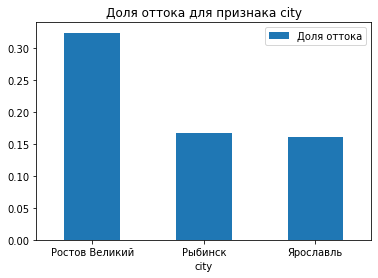

<Figure size 648x360 with 0 Axes>

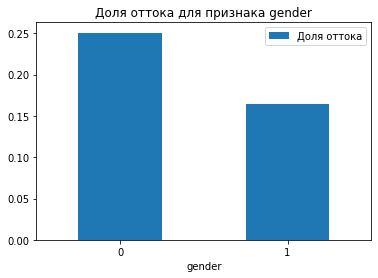

<Figure size 648x360 with 0 Axes>

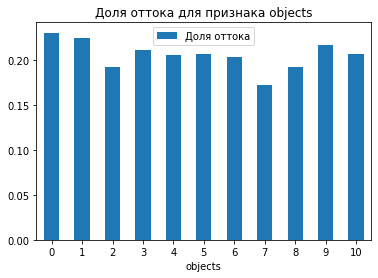

<Figure size 648x360 with 0 Axes>

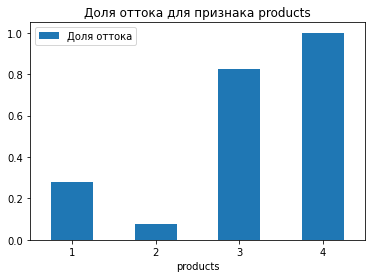

<Figure size 648x360 with 0 Axes>

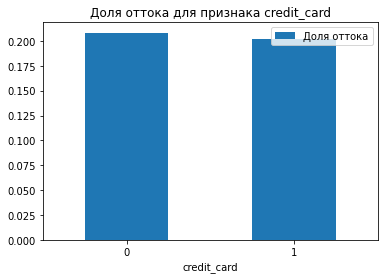

<Figure size 648x360 with 0 Axes>

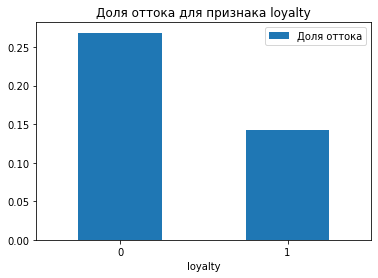

In [36]:
for column in category_list:
    plt.figure(figsize=(9,5))
    df.groupby(column)[['churn']].mean().plot(kind='bar', rot=360, fontsize=10)  
    plt.title('Доля оттока для признака {}'.format(column),fontsize=12)
    plt.legend(['Доля оттока'])
    plt.show();

**Вывод**

По графикам видно:
* Доля оттока в городе Ростов Великий – выше 30%. По сравнению с другими городами, почти в два раза больше. Надо проверить, почему так много клиентов уходят именно в этом городе.
* Доля оттока среди женщин выше, чем среди мужчин.
* Доля оттока в разрезе по объектам недвижимости чуть выше у клиентов, владеющих 1 объектом недвижимости или не владеющими ничем.
* Клиенты с 4 продуктами есть только в отточной группе. Очень высока доля оттока у клиентов с 3 банковскими продуктами (около 80%) Ниже всего доля оттока у клиентов с 2 банковскими продуктами. 
* У клиентов,  которых есть банковская карта и у которых ее нет доля оттока примерно одинакова (около 20%).
* Доля оттока у активных клиентов практически в два раза меньше, чем у неактивных.

**Проверим распределение для числовых признаков.**

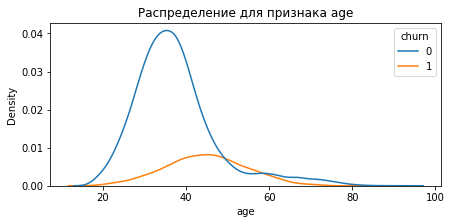

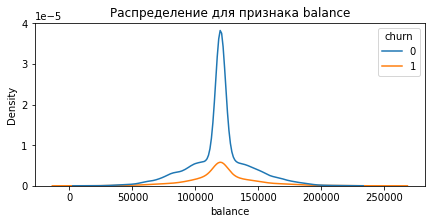

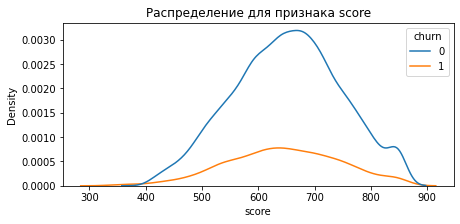

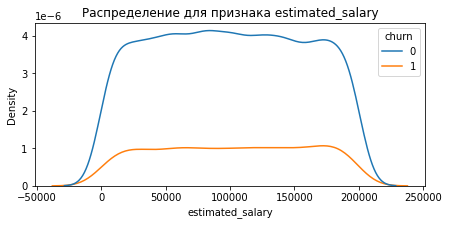

In [37]:
num_list = ['age', 'balance', 'score', 'estimated_salary']
for column in num_list:
    plt.figure(figsize=(7,3))
    sns.kdeplot(data=df, x=column, hue="churn")
    plt.title('Распределение для признака {}'.format(column),fontsize=12)
    #plt.legend(['Доля оттока'])
    plt.show();

**Вывод**

* Средний возраст у тех, кто остался, меньше, чем у тех, кто ушел.
* Клиентов после 65 лет мало. 
* Видно, что много отточных клиентов в возрастной группе **после 40**. Те,кто младше, меньше уходят в отток.
* Остальные распределения более-менее похожи.

**Проверим колонку "score" на выбросы.
Для этого построим boxplot.**

Text(0.5, 1.0, 'Распределение признака "score"')

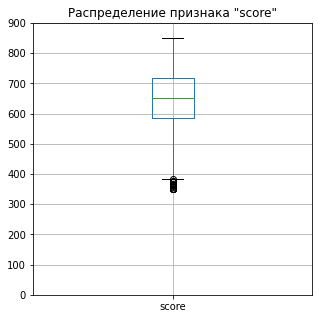

In [38]:
df.boxplot(column=['score'], figsize=(5,5)).set_ylim(0,900);
plt.title('Распределение признака "score"')

**Вывод**

На графике видим единичные выбросы. Но поскольку их очень мало и разница значений с минимумом небольшой. Думаю, что это не критично и их можно оставить

**Построим матрицу корреляций и отобразим её.**

In [39]:
cm = df.corr()

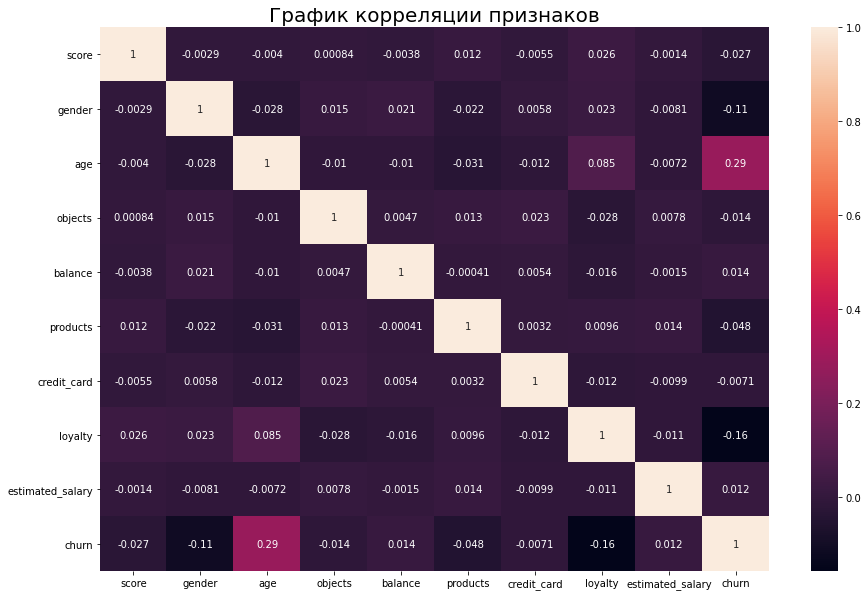

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True)
plt.title('График корреляции признаков', fontsize=20);

**Вывод**

С целевой переменной **churn** ни один из признаков сильно не коррелирует (признак **age** все же чуть больше, чем остальные). Друг с другом признаки также не связаны.


<a id="model"></a> 
## Построение модели прогнозирования оттока клиентов (Решающее дерево)

In [41]:
# превратим категориальные признаки (город) в числовые
df_num = pd.get_dummies(df)

In [42]:
df_num.head()

,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,...,city_Ярославль,age_group_18-24,age_group_25-44,age_group_45-65,age_group_старше 65 лет,product_group_1-2 продукта,product_group_3-4 продукта,estimated_salary_group_низкий,estimated_salary_group_средний,estimated_salary_group_высокий
0,619,0,42,2,"119,927.77",1,1,1,"101,348.88",1,...,1,0,1,0,0,1,0,0,1,0
1,608,0,41,1,"83,807.86",1,0,1,"112,542.58",0,...,0,0,1,0,0,1,0,0,1,0
2,502,0,42,8,"159,660.80",3,1,0,"113,931.57",1,...,1,0,1,0,0,0,1,0,1,0
3,699,0,39,1,"119,927.77",2,0,0,"93,826.63",0,...,1,0,1,0,0,1,0,0,1,0
4,850,0,43,2,"125,510.82",1,1,1,"79,084.10",0,...,0,0,1,0,0,1,0,0,1,0


In [43]:
# разделим данные на признаки и целевую переменную
X = df_num.drop('churn', axis=1)
y = df_num['churn']

Так как в целевом признаке есть дисбаланс классов, то выборки лучше стратифицировать с помощью параметра stratify.

In [44]:
# разобьем данные на обучающую и валидационную выборку в отношении 80:20 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

In [45]:
# зададим алгоритм для модели
tree_model = DecisionTreeClassifier(max_leaf_nodes=6, random_state=0) 

In [46]:
# обучим модель и сделаем прогноз
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

Проверим основные метрики качества модели

In [47]:
display('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_pred)))
display('Precision: {:.2f}'.format(precision_score(y_test, tree_pred)))
display('Recall: {:.2f}'.format(recall_score(y_test, tree_pred)))

'Accuracy: 0.84'

'Precision: 0.71'

'Recall: 0.40'

Дерево предсказывает около 84% решений, доля правильных ответов среди целевого класса 86 %. Не так уж и плохо. Но хотелось бы лучше.А вот реальных объектов **1** класса (**recall**) модель показывает только около 27%. Это потому, что деревья принятия решений очень эффективно работают с обучающими данными, которые использовались для их построения, но они не являются гибкими, когда дело доходит до классификации новой выборки.

Визуализируем наше дерево.

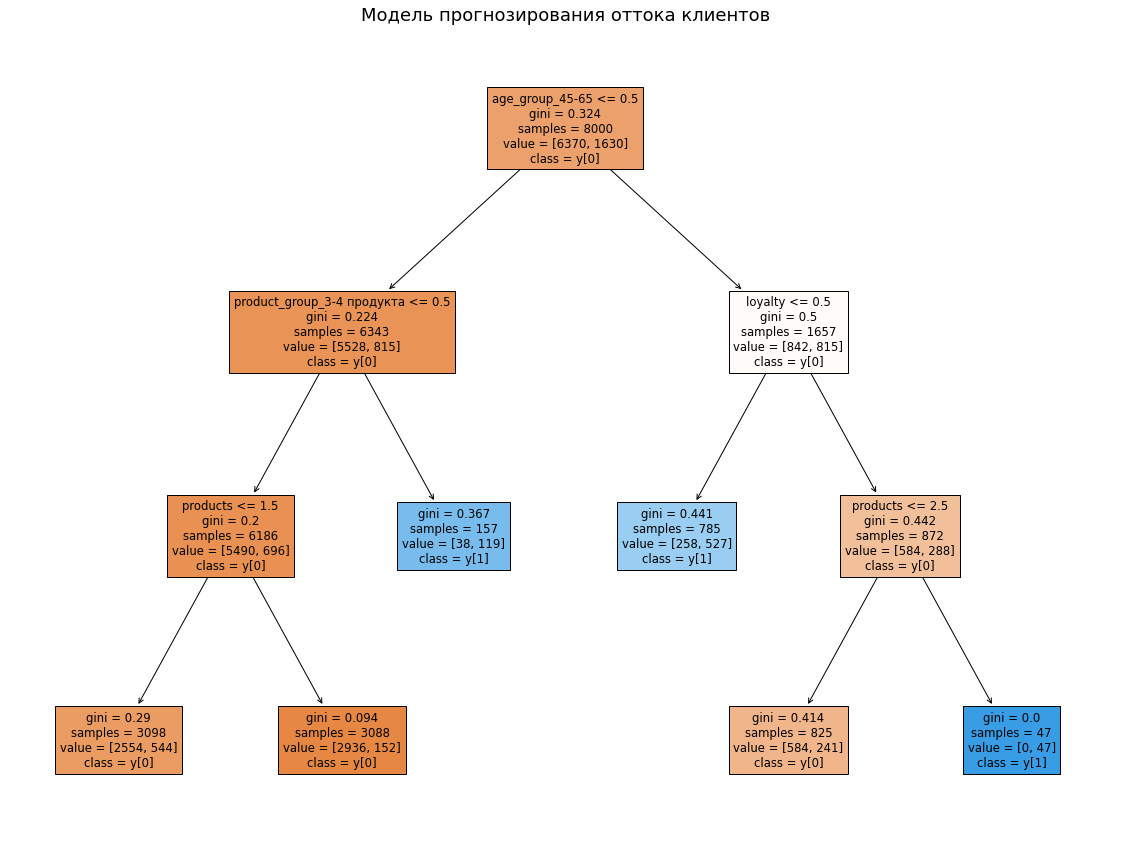

In [48]:
plt.figure(figsize = (20,15)) 
tree.plot_tree(tree_model, filled=True, feature_names = X_train.columns, class_names = True)
plt.title('Модель прогнозирования оттока клиентов', fontsize=18)
plt.show() 


**Вывод**

Итак, мы построили дерево решений, ограничив число узлов. Признаки, которые наша модель выбрала, как решающие при прогнозировании оттока - это **age, products и loyalty**. 
Пройдем путь до нижнего листа (**gini=0.371**). Начинаем с корневого (самого верхнего узла). **Возраст <= 42,5 лет (Ответ:нет)** ---> **Активность <= 0.5 (Ответ: нет)** ---> **Количество банковских продуктов <=2.5 (Ответ:да)** ---> **Клиент не уйдет в отток** \
Продолжим исследование. 

<a id="portrait"></a>
## Составление портрета клиента, который ушел в отток

Итак, при анализировании данных мы выяснили, что есть несколько признаков, которые,скорее всего, связаны с оттоком клиентов:
* возраст;
* лояльность;
* количество банковских продуктов у клиента;
* город;
* пол.

Проверим, действительно ли это так.

**ВОЗРАСТ**

Проверим, как влияет возраст клиента на целевой показатель (отток). Когда мы смотрели на распределение признака **age**, видели,что основная масса отточных клиентов находится в возрасной группе **+40-45 лет**. Когда построили дерево принятия решений, также увидели, что первым признаком оно предложило **возраст 42,5**. Сделаем 2 среза по основному датасету с клиентами **40 года и старше** и клиентами **младше 40 лет**

In [49]:
age_after_40 = df.query('age >=40')
age_before_40 = df.query('age < 40')

Построим сводные таблицы по признаку **churn** для двух таблиц

In [50]:
# Построим сводную таблицу для клиентов, кому больше 40 лет
age_after_40_grouped = (
    age_after_40.pivot_table(index='churn', values='score', aggfunc='count')
        .rename(columns={'score':'count'})
        .reset_index()
)
age_after_40_grouped 

,churn,count
0,0,2573
1,1,1440


In [51]:
# Построим сводную таблицу для клиентов, кому меньше 40 лет
age_before_40_grouped = (
    age_before_40.pivot_table(index='churn', values='score', aggfunc='count')
        .rename(columns={'score':'count'})
        .reset_index()
)
age_before_40_grouped 

,churn,count
0,0,5390
1,1,597


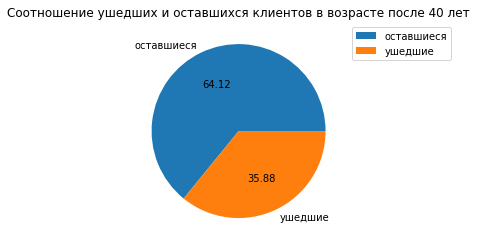

In [52]:
labels=['оставшиеся', 'ушедшие']
plt.pie(age_after_40_grouped['count'], labels=labels, autopct='%.2f')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Соотношение ушедших и оставшихся клиентов в возрасте после 40 лет');

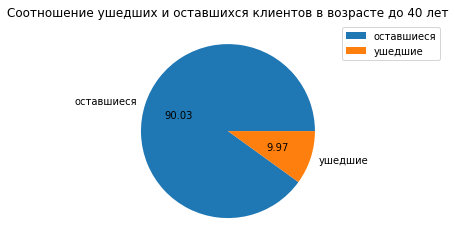

In [53]:
plt.pie(age_before_40_grouped['count'], labels=labels, autopct='%.2f')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Соотношение ушедших и оставшихся клиентов в возрасте до 40 лет');

Построим еще график изменения доли клиентов, которые ушли в отток, в зависимости от их возраста.

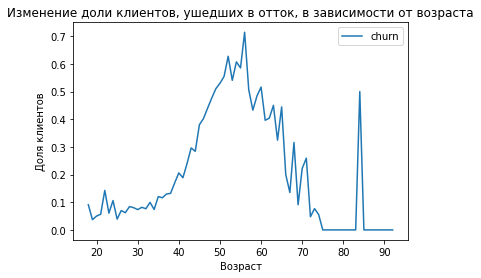

In [54]:
df.groupby('age')[['churn']].mean().plot()
plt.xlabel('Возраст')
plt.ylabel('Доля клиентов')
plt.title('Изменение доли клиентов, ушедших в отток, в зависимости от возраста');

**Вывод**

По круговым диаграммам видно, что в возрастной группе **после 40 лет** около 36% клиентов ушли в отток, тогда как в возрастной группе **до 40 лет** ушедших клиентов всего около 10%. Также график изменения доли отточных клиентов в зависимости от возраста клиентов показал что, основная масса отточных клиентов находится в возрастной группе **40 - 70 лет**. Также есть пик около значения возраста - **85 лет**.

**ГОРОД**

Мы выяснили, что наибольший отток клиентов - в городе **Ростов Великий**. Выясним, почему и как взаимосвязан город с другими параметрами(активностью, полом, количеством продуктов), как отличается доля оттока в разрезе разных параметров. Для начала построим график, чтобы выяснить доли оттока в разных городах.

In [55]:
# Построим сводную таблицу
data_city = (
   df.pivot_table(index='city', values='churn', aggfunc='mean')
        .rename(columns={'churn':'churn_share'})
        .reset_index()
)
data_city 

,city,churn_share
0,Ростов Великий,0.32
1,Рыбинск,0.17
2,Ярославль,0.16


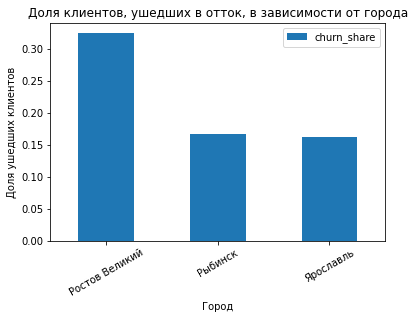

In [56]:
data_city.plot(x='city',y='churn_share',kind='bar', rot=30,fontsize=10)
plt.title('Доля клиентов, ушедших в отток, в зависимости от города')
plt.xlabel('Город')
plt.ylabel('Доля ушедших клиентов');

**Вывод**

Доля оттока в Ростове Великом практически в 2 раза больше, чем в двух других городах.

**Город - активность клиента**

Посмотрим на долю отточных клиентов в зависимости от города и активности клиентов.

In [57]:
city_loyalty = df.pivot_table(index='city', columns='loyalty', values='churn', aggfunc='mean').reset_index()
city_loyalty

loyalty,city,0,1
0,Ростов Великий,0.41,0.24
1,Рыбинск,0.23,0.11
2,Ярославль,0.21,0.12


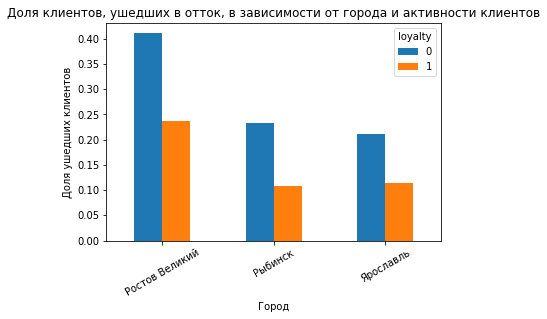

In [58]:
city_loyalty.plot(x="city",y=[0, 1],kind='bar',rot=30,fontsize=10)
plt.title('Доля клиентов, ушедших в отток, в зависимости от города и активности клиентов')
plt.xlabel('Город')
plt.ylabel('Доля ушедших клиентов');

**Вывод**

Действительно, доля отточных неактивных клиентов в этом городе (около 40%) намного выше, чем в двух других (около 20%). Но и активных клиентов, которые ушли в отток (около 25%), больше, чем в других городах (около 10%). Поэтому можно сделать вывод, что активность клиента никак не связана с городом, где он проживает.

**Город - пол**

In [59]:
city_gender = df.pivot_table(index='city', columns='gender', values='churn', aggfunc='mean').reset_index()
city_gender

gender,city,0,1
0,Ростов Великий,0.38,0.28
1,Рыбинск,0.21,0.13
2,Ярославль,0.20,0.13


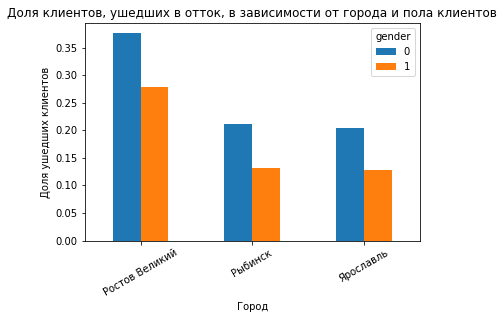

In [60]:
city_gender.plot(x="city",y=[0, 1],kind='bar',rot=30,fontsize=10)
plt.title('Доля клиентов, ушедших в отток, в зависимости от города и пола клиентов')
plt.xlabel('Город')
plt.ylabel('Доля ушедших клиентов');

**Вывод**

Опять мы видим, что доля оттока и женщин и мужчин выше в Ростове Великом. (причем разница доли оттока у женщин и мужчин во всех трех городах около 10%, у женщин доля оттока выше).

**Город-количество банковских продуктов**

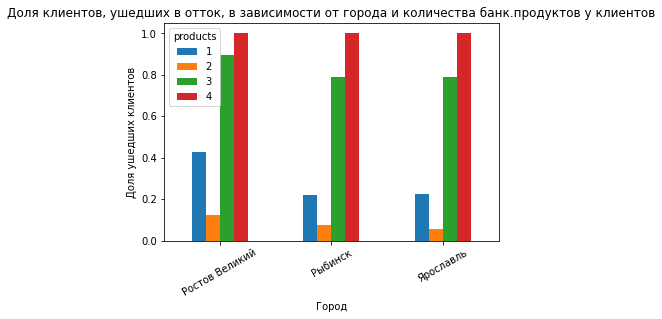

In [61]:
city_products = df.pivot_table(index='city', columns='products', values='churn', aggfunc='mean').reset_index()
city_products.plot(x="city",y=[1, 2, 3, 4],kind='bar',rot=30,fontsize=10)
plt.title('Доля клиентов, ушедших в отток, в зависимости от города и количества банк.продуктов у клиентов')
plt.xlabel('Город')
plt.ylabel('Доля ушедших клиентов');

**Вывод**

Видим, что меньше всего уходят в отток клиенты у которых 2 банковских продукта. Самый высокий уровень оттока у клиентов с 3 (90%) и 4 (100%) банковскими продуктами. Но в городе **Ростов Великий** доля оттока среди тех, у кого 1 банковский продукт также высока(около 40%).

**ПОЛ**

Сначала узнаем долю оттока в общем среди мужчин и женщин.

In [62]:
# Построим сводную таблицу
data_gender = (
   df.pivot_table(index='gender', values='churn', aggfunc='mean')
        .rename(columns={'churn':'churn_share'})
        .reset_index()
)
data_gender 

,gender,churn_share
0,0,0.25
1,1,0.16


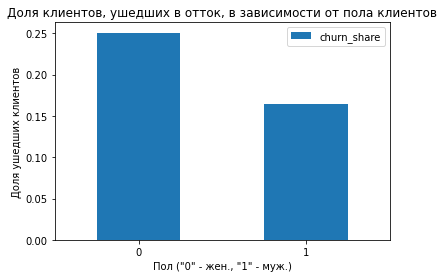

In [63]:
data_gender.plot(x='gender',y='churn_share',kind='bar', rot=360,fontsize=10)
plt.title('Доля клиентов, ушедших в отток, в зависимости от пола клиентов')
plt.xlabel('Пол ("0" - жен., "1" - муж.)')
plt.ylabel('Доля ушедших клиентов');

Проверим, много ли среди мужчин и женщин активных клиентов.

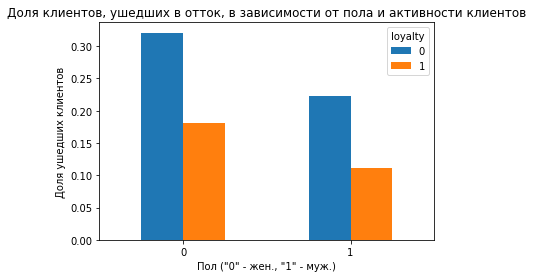

In [64]:
gender_loyalty = df.pivot_table(index='gender', columns='loyalty', values='churn', aggfunc='mean').reset_index()
gender_loyalty.plot(x="gender",y=[0, 1],kind='bar',rot=360,fontsize=10)
plt.title('Доля клиентов, ушедших в отток, в зависимости от пола и активности клиентов')
plt.xlabel('Пол ("0" - жен., "1" - муж.)')
plt.ylabel('Доля ушедших клиентов');

**Вывод**

Доля оттока у женщин - 25%, у мужчин - 16%. Доля оттока среди неактивных клиентов женского пола выше,чем у активных. Также, как и у мужчин. Таким образом, активность и пол клиента никак не связаны.

**АКТИВНОСТЬ**

In [65]:
# Построим сводную таблицу
data_loyalty = (
   df.pivot_table(index='loyalty', values='churn', aggfunc='mean')
        .rename(columns={'churn':'churn_share'})
        .reset_index()
)
data_loyalty 

,loyalty,churn_share
0,0,0.27
1,1,0.14


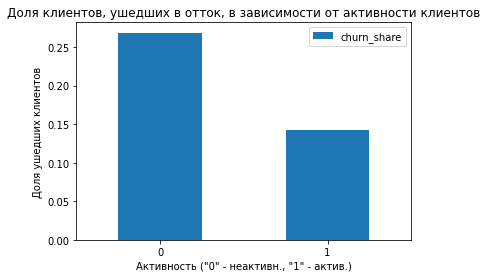

In [66]:
data_loyalty.plot(x='loyalty',y='churn_share',kind='bar', rot=360,fontsize=10)
plt.title('Доля клиентов, ушедших в отток, в зависимости от активности клиентов')
plt.xlabel('Активность ("0" - неактивн., "1" - актив.)')
plt.ylabel('Доля ушедших клиентов');

**Вывод**

Доля оттока среди неактивных клиентов выше практически в 2 раза, чем у активных. 

**КОЛИЧЕСТВО У КЛИЕНТОВ БАНКОВСКИХ ПРОДУКТОВ**

In [67]:
products_churn = (
   df.pivot_table(index='products', values='churn', aggfunc='mean')
        .rename(columns={'churn':'churn_share'})
        .sort_values(by='churn_share', ascending=False)
)
products_churn

,churn_share
products,
4,1.00
3,0.83
1,0.28
2,0.08


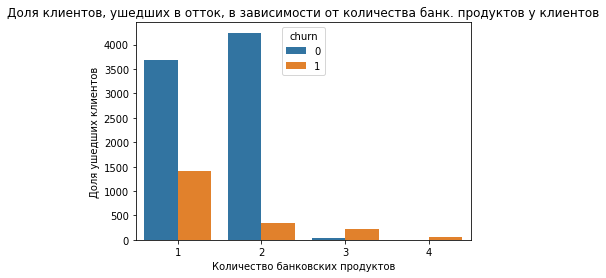

In [68]:
sns.countplot(x = df['products'], hue='churn', data=df)
plt.title('Доля клиентов, ушедших в отток, в зависимости от количества банк. продуктов у клиентов')
plt.xlabel('Количество банковских продуктов')
plt.ylabel('Доля ушедших клиентов');

**Вывод**

Итак, мы видим,что самые склонные к оттоку клиенты - это клиенты с **1, 3 или 4 продуктами**.

**Построим также графики взаимодействия признаков**

**ГРАФИК ДОЛИ ОТТОКА В ЗАВИСИМОСТИ ОТ ГОРОДА, ПОЛА И УРОВНЯ ЗАРПЛАТЫ**

In [69]:
city_gender = df.groupby(['city', 'gender', 'estimated_salary_group'])[['churn']].mean()\
  .sort_values(by='churn', ascending=False)\
  .reset_index()  

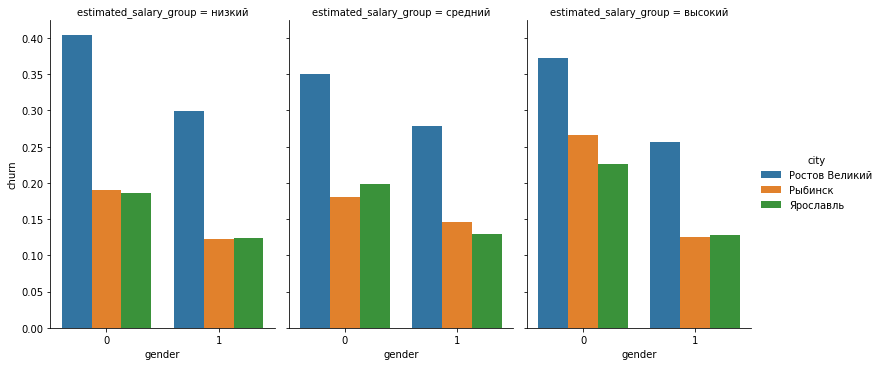

In [70]:
sns.catplot(x="gender", y="churn",
                hue="city", col="estimated_salary_group",
                data=city_gender, kind="bar",
                height=5, aspect=.7);
#plt.title('Доля оттока в зависимости от города, пола и уровня зар.платы')

**Вывод**

Самая высокая доля оттока у женщин из Ростова Великого с низким уровнем дохода.

**ГРАФИК ДОЛИ ОТТОКА В ЗАВИСИМОСТИ ОТ ГОРОДА, ПОЛА И ВОЗРАСТНОЙ ГРУППЫ**

In [71]:
city_age_gender = df.groupby(['city', 'gender', 'age_group'])[['churn']].mean()\
  .sort_values(by='churn', ascending=False)\
  .reset_index()  
city_age_gender

,city,gender,age_group,churn
0,Ростов Великий,0,45-65,0.68
1,Ростов Великий,1,45-65,0.63
2,Ярославль,0,45-65,0.52
3,Рыбинск,0,45-65,0.44
4,Ростов Великий,0,старше 65 лет,0.41
5,Ярославль,1,45-65,0.35
6,Рыбинск,1,45-65,0.33
7,Ростов Великий,0,25-44,0.26
8,Ростов Великий,0,18-24,0.24
9,Ростов Великий,1,25-44,0.18


''

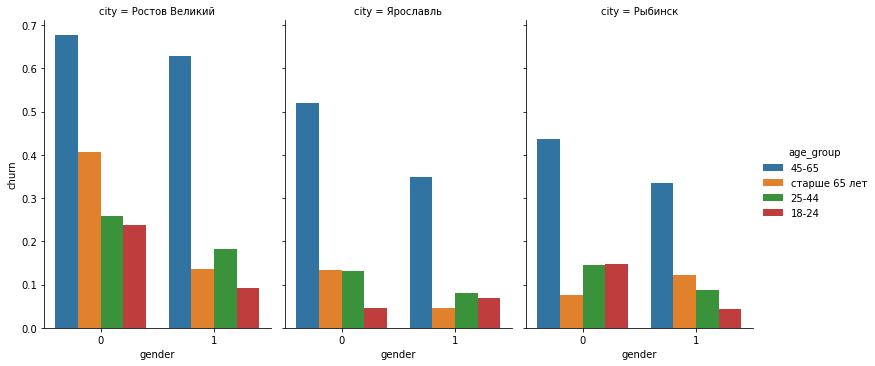

In [72]:
sns.catplot(x="gender", y="churn",
                hue="age_group", col="city",
                data=city_age_gender, kind="bar",
                height=5, aspect=.7)
;

**Вывод**

Самая высокая доля оттока у клиентов из Ростова Великого возраста 45-65 лет.

**ГРАФИК ДОЛИ ОТТОКА В ЗАВИСИМОСТИ ОТ ГОРОДА, ПОЛА И КОЛИЧЕСТВА БАНК.ПРОДУКТОВ**

In [73]:
city_age_gender = df.groupby(['city', 'gender', 'product_group'])[['churn']].mean()\
  .sort_values(by='churn', ascending=False)\
  .reset_index()  

''

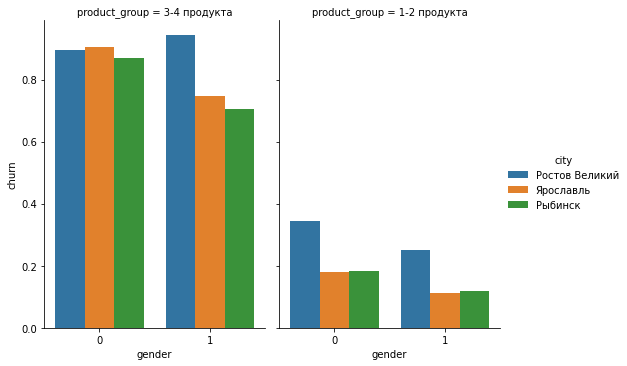

In [74]:
sns.catplot(x="gender", y="churn",
                hue="city", col="product_group",
                data=city_age_gender, kind="bar",
                height=5, aspect=.7)
;

**Вывод**

Итак, очень высокая доля оттока у клиентов, имеющих 3-4 продукта. Причем, у мужчин из города Ростова Великого с 3-4 продуктами чуть выше, чем у других.

**ГРАФИК ДОЛИ ОТТОКА В ЗАВИСИМОСТИ ОТ ГОРОДА, ВОЗРАСТА И АКТИВНОСТИ КЛИЕНТА**

In [75]:
city_loyalty_gender = df.groupby(['city', 'gender', 'loyalty'])[['churn']].mean()\
  .sort_values(by='churn', ascending=False)\
  .reset_index()


In [76]:
city_loyalty_gender = df.groupby(['city', 'gender', 'loyalty'])[['churn']].mean()\
  .sort_values(by='churn', ascending=False)\
  .reset_index()

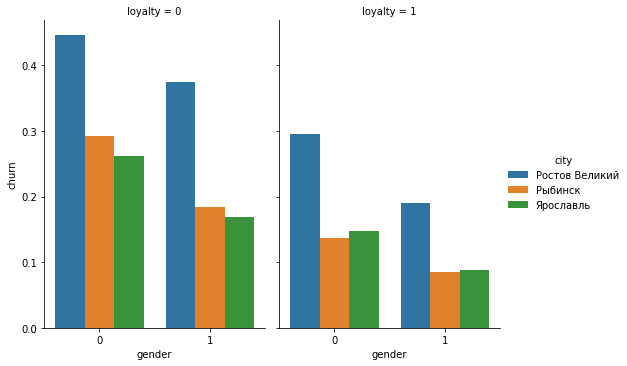

In [77]:
sns.catplot(x="gender", y="churn",
                hue="city", col="loyalty",
                data=city_loyalty_gender, kind="bar",
                height=5, aspect=.7)

**Вывод**

Доля оттока у неактивных клиентов женского пола из города Ростова Великого составляет 45%. 

**ВЫВОД**

Итак, мы выяснили наиболее важные признаки, характерные для клиентов, склонных к оттоку:
* Доля оттока наиболее высока в городе **Ростов Великий** (32%), тогда как в других городах она составляет 16-17%.
* Всех больше склонны к оттоку клиенты в возрасте 40-65 лет. Доля оттока у них выше 36%. ТОгда как в возрастной группе до 40 лет ушли всего около 10% клиентов.
* К оттоку больше склонны женщины, чем мужчины. Доля оттока у женщин - 25%, у мужчин - 16%.
* Доля оттока высока у клиентов, имеющих 3-4 банковских продукта.
* Доля оттока у неактивных клиентов 27%, у активных почти в 2 раза меньше - 14%.

**Доля оттока при взаимодействии признаков**\
Самый высокий уровень оттока:
- у женщин из Ростова Великого с низким уровнем дохода(около 40%).
- у клиентов из Ростова Великого возраста 45-65 лет (около 70%).
- у клиентов из Ростова Великого, имеющих 3-4 банковских продукта (около 90%).

<a id="klast"></a> 
## Кластеризация клиентов

In [78]:
# стандартизуем признаки
sc = StandardScaler()
X_sc = sc.fit_transform(X)

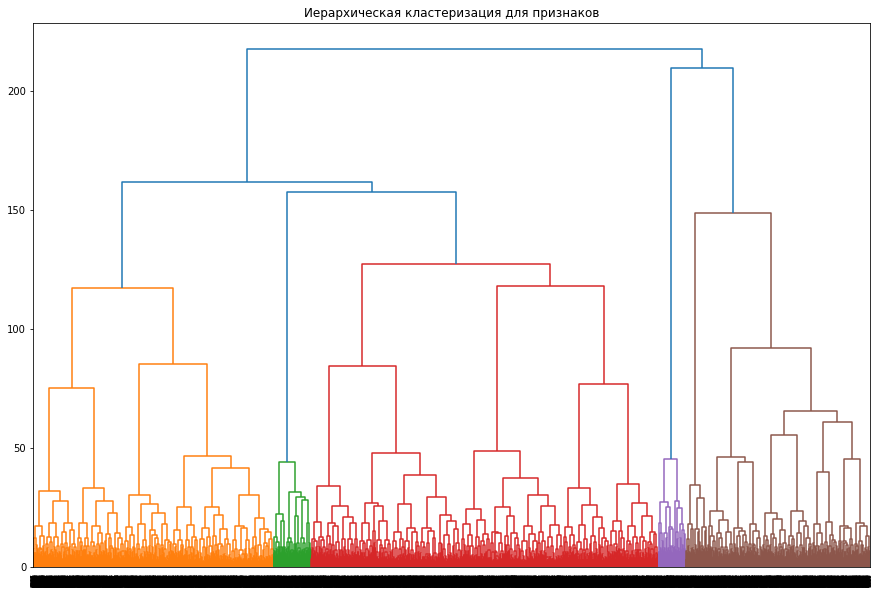

In [79]:
# построим матрицу расстояний на стандартизованной матрице признаков 
linked = linkage(X_sc, method='ward')

# нарисуем дендрограмму
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация для признаков');

In [80]:
# обучим модель кластеризации и спрогнозируем кластеры клиентов (возьмем число 3)
km = KMeans(n_clusters=3, random_state=0)
labels = km.fit_predict(X_sc)

In [81]:
df_num['cluster'] = labels

In [82]:
df_num.head()

,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,...,age_group_18-24,age_group_25-44,age_group_45-65,age_group_старше 65 лет,product_group_1-2 продукта,product_group_3-4 продукта,estimated_salary_group_низкий,estimated_salary_group_средний,estimated_salary_group_высокий,cluster
0,619,0,42,2,"119,927.77",1,1,1,"101,348.88",1,...,0,1,0,0,1,0,0,1,0,1
1,608,0,41,1,"83,807.86",1,0,1,"112,542.58",0,...,0,1,0,0,1,0,0,1,0,1
2,502,0,42,8,"159,660.80",3,1,0,"113,931.57",1,...,0,1,0,0,0,1,0,1,0,0
3,699,0,39,1,"119,927.77",2,0,0,"93,826.63",0,...,0,1,0,0,1,0,0,1,0,1
4,850,0,43,2,"125,510.82",1,1,1,"79,084.10",0,...,0,1,0,0,1,0,0,1,0,1


**Посмотрим на средние значения признаков для кластеров.**

In [83]:
df_num.drop('churn', axis=1).groupby('cluster').mean()

,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,city_Ростов Великий,...,city_Ярославль,age_group_18-24,age_group_25-44,age_group_45-65,age_group_старше 65 лет,product_group_1-2 продукта,product_group_3-4 продукта,estimated_salary_group_низкий,estimated_salary_group_средний,estimated_salary_group_высокий
cluster,,,,,,,,,,,,,,,,,,,,,
0,649.11,0.43,43.65,5.06,"120,009.09",3.18,0.71,0.44,"104,400.14",0.37,...,0.41,0.02,0.55,0.41,0.02,0.00,1.00,0.28,0.39,0.33
1,650.01,0.55,38.87,4.99,"119,827.68",1.47,0.71,0.52,"66,691.68",0.24,...,0.51,0.05,0.73,0.20,0.03,1.00,0.00,0.50,0.50,0.00
2,651.72,0.55,38.55,5.05,"119,879.29",1.48,0.70,0.51,"166,441.34",0.25,...,0.50,0.05,0.73,0.20,0.03,1.00,0.00,0.00,0.00,1.00


**Вывод**

Итак, модель поделила данные на 3 кластера в зависимости от города: Ростов Великий, Рыбинск и Ярославль. Практически все средние значения признаков для этих городов схожи. Но в **0** кластере среднее значение возраста клиентов чуть выше, чем в 2 других, а уровень лояльности наоборот чуть ниже.

**Посчитаем долю оттока для каждого полученного кластера.**

In [84]:
df_num.groupby('cluster')[['churn']].mean().sort_values('churn', ascending=False)

,churn
cluster,
0,0.86
2,0.19
1,0.18


**Вывод**

Доля оттока в **0** кластере практически в 2 раза выше, чем в **1** и **2**.

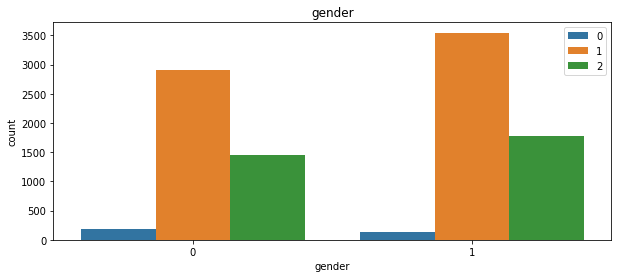

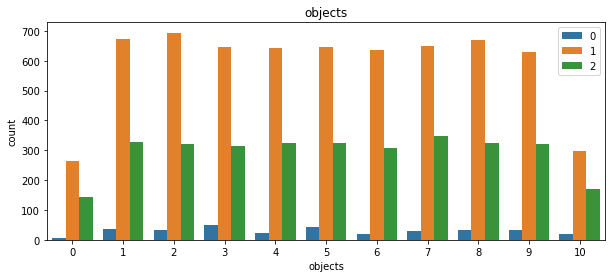

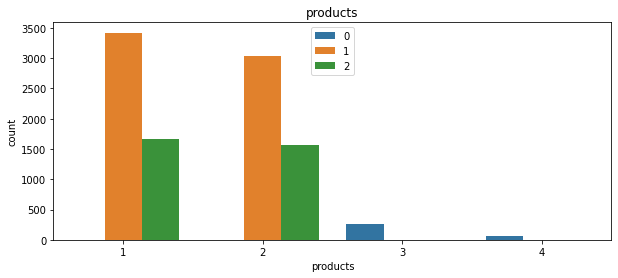

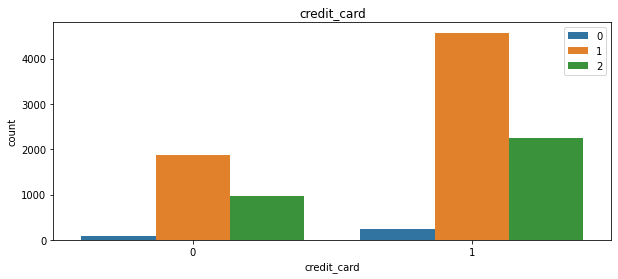

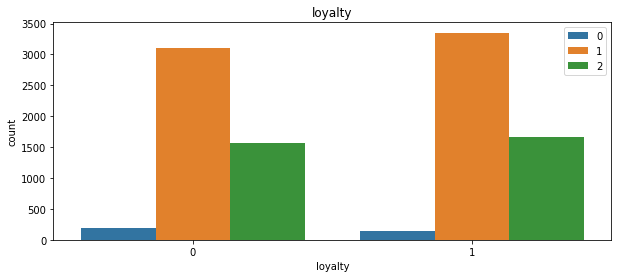

In [85]:
# Построим графики распределения для категориальных признаков
categorical_columns = ['gender', 'objects', 'products', 'credit_card', 'loyalty']
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x = df_num[column], hue='cluster', data=df_num)
    plt.title(column)
    plt.legend()
    plt.show()

**Вывод**

Поскольку доля клиентов из Ярославля (2 кластер) выше по сравнению с другими городами, зеленый столбец выделяется. В целом, распределения схожи с графиками, которые мы делали по общей таблице. Мужчин во все 3 кластерах чуть больше чем женщин. Около 70% клиентов всех трех кластеров имеют кредитную карту. Примерно половина в каждом кластере - это лояльные клиенты.

<Figure size 360x216 with 0 Axes>

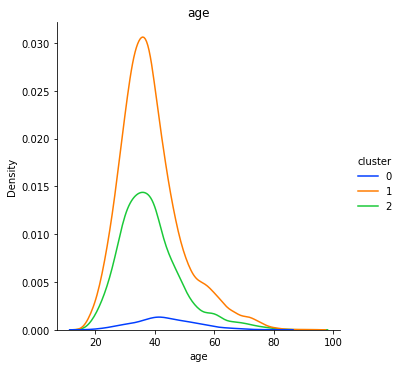

<Figure size 360x216 with 0 Axes>

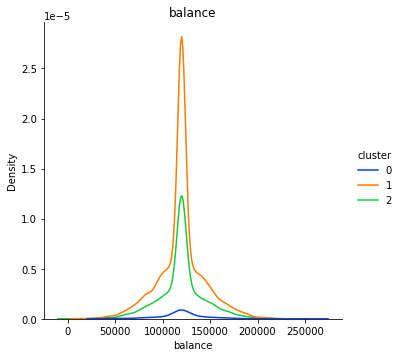

<Figure size 360x216 with 0 Axes>

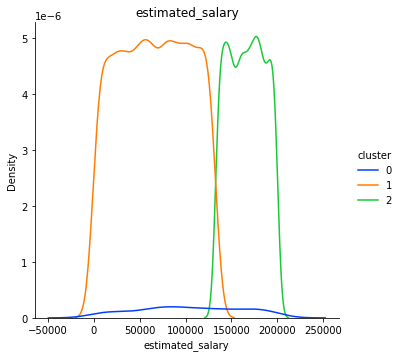

In [86]:
# Построим графики распределения для числовых признаков
num_columns = ['age', 'balance','estimated_salary']
    
for column in num_columns:
    plt.figure(figsize=(5, 3))
    sns.displot(x = df_num[column], hue='cluster', data=df_num, kind='kde', palette='bright')
    plt.title(column)
    plt.show();

**Вывод**

График по возрасту показывает что основная масса клиентов находится в возрастной группе 20-60 лет. Клиентов старше 60 мало. Среднее значение баланса во все трех кластеров примерно одинаково - около 100000. Распределение зарплаты также схоже во всех кластерах.

**ВЫВОД**

Модель кластеризации выделила 3 кластера в зависимости от города. Распределения во всех кластерах похожи. Уровень оттока в **0** кластере (**Ростов Великий**) - 32%, что в 2 раза больше, чем в двух остальных. Также в **0** кластере активных клиентов меньше, чем в остальных кластерах. Средний возраст в **0** кластере выше по сравнению с другими.

<a id="hip"></a>
## Проверка статистических гипотез

**1. Гипотеза о равенстве среднего дохода клиентов, которые ушли и тех, кто остался.**

Сформулируем гипотезы:

    - H0: Средний доход ушедших в отток и оставшихся клиентов не различается.
    - H1: Средний доход ушедших в отток и оставшихся клиентов различается.

Для начала хочу проверить, нормально ли распределение данных (доход клиентов) с помощью критерия Шапиро-Уилка.

In [87]:
alpha = 0.05  # установим критический уровень статистической значимости

results = st.shapiro(df['estimated_salary'])
p_value = results[1]

display('p-значение: ', p_value)

if p_value < alpha:
    display('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    display('Не получилось отвергнуть нулевую гипотезу, всё нормально')

'p-значение: '

0.0

'Отвергаем нулевую гипотезу: распределение не нормально'

Итак, распределение не нормально. Этого следовало ожидать, так как данные о доходах, продажах и т.п. редко бывают нормальные. Будем использовать **тест Манна-Уитни.**

Сделаем 2 среза по датасету с ушедшими и оставшимися клиентами.

In [88]:
data_churn_0 = df[df['churn'] == 0]
data_churn_1 = df[df['churn'] == 1]

In [89]:
# Установим пороговое значение
alpha = 0.05

Будем сравнивать зарплату клиентов.

In [90]:
churn_0 = data_churn_0['estimated_salary']
churn_1 = data_churn_1['estimated_salary']

In [91]:
# Передадим критерию mannwhitneyu() данные о доходе клиентов
p_val = '{0:.3f}'.format(st.mannwhitneyu(churn_0,churn_1)[1])
p_val = float(p_val)

In [92]:
display('p-значение:', p_val)
if (p_val < alpha):
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-значение:'

0.227

'Не получилось отвергнуть нулевую гипотезу'

**Вывод**

Нулевую гипотезу не удалось опровергнуть. Разница между средним доходом у групп, если и есть, то она не является статистически значимой. Можно сделать вывод, что доход клиентов, которые ушли, скорее всего, не отличается от дохода клиентов,которые остались.

**2. Гипотеза о равенстве среднего возраста у клиентов, которые ушли и клиентов, которые остались.**

Сформулируем гипотезы:

    - H0: Средний возраст у клиентов, ушедших в отток, и оставшихся клиентов не различается.
    - H1: Средний возраст у клиентов, ушедших в отток, и оставшихся клиентов различается.

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой. Кроме того, обе выборки достаточно большие. Поэтому даже если распределение не совсем нормально, то этоне повлияет на результат.

Сделаем 2 выборки по возрасту в зависимости от значения колонки "churn".

In [93]:
age_churn_0 = data_churn_0['age']
age_churn_1 = data_churn_1['age']

In [94]:
# проверим размеры выборок
display(age_churn_0.shape)
age_churn_1.shape


(7963,)

(2037,)

In [95]:
# посмотрим на дисперсию этих 2 выборок
display(age_churn_0.var())
age_churn_1.var()

102.52297408041709

95.28808400195597

In [96]:
# посмотрим на стандартное отклонение выборок
display(age_churn_0.std())
age_churn_1.std()

10.125362911047539

9.76156155550719

Поскольку размер выборок разных и дисперсия немного отличается, сделаем параметр **equal_var** равным **False**.

In [97]:
# Установим пороговое значение
alpha = 0.05

results = st.ttest_ind(age_churn_0, age_churn_1, equal_var=False)

In [98]:
display('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-значение:'

4.7127272656641046e-179

'Отвергаем нулевую гипотезу'

Выведем средний возраст клиентов у оставшихся и ушедших клиентов.

In [99]:
df.groupby('churn')[['age']].mean()

,age
churn,
0,37.41
1,44.84


**Вывод**

Итак, нулевую гипотезу мы отвергаем. Можно сделать вывод, что средний возраст клиентов, ушедших в отток, скорее всего, отличается от среднего возраста оставшихся клиентов. Это также подтверждается и таблицей, мы видим, что средний возраст у ушедших выше, чем у оставшихся.

<a id="total"></a>
## Общий вывод

На основе нашего ислледования мы выяснили наиболее значимые **черты клиента**, склонного к оттоку:
* Доля оттока наиболее высока в городе **Ростов Великий** (32%), тогда как в других городах она составляет 16-17%. Разница почти в два раза.
* У клиентов из **Ростова** возраста **45-65** лет доля оттока составляет около 70%.
* Рассматривая параметр **активность клиента**, самый высокий уровень оттока у **неактивных** клиентов **женского пола** из города **Ростова Великого** (доля оттока составляет **45%**). 
* В срезе города, пола и уровня дохода наиболее высокий отток у **женщин из города Ростова Великого с низким уровнем заработной платы** (доля оттока - **около 40%**).
* В разрезе по количеству банковских продуктов, городу и полу больше всего доля оттока у мужчин из города Ростова с **3-4 продуктами** (доля оттока около 90%).

Было проверено 2 гипотезы:
- Гипотеза о равенстве среднего дохода клиентов, которые ушли и тех, кто остался.
- Гипотеза о равенстве среднего возраста клиентов уходящих в отток и оставшихся.

Первую гипотезу не удалось опровергнуть. Значит, отток не связан с средним доходом клиентов.
Вторую гипотезу мы опровергли. Скорее всего, средний возраст у оставшихся и ушедших клиентов различается. (у ушедших он выше)

**РЕКОМЕНДАЦИИ**
1) Большая часть ушедших клиентов - из города **Ростов Великий**. Надо проверить, почему клиенты уходят именно из банка, расположенного в этом городе. Чтобы детальнее исследовать причины ухода именно из банка этого города потребуются дополнительные сведения (например, какими именно услугами пользовались эти клиенты) Возможно в этом городе появился конкурент с более выгодными предложениями. Таже мы выяснили,что доля ушедших клиентов,имеющих 1 банковский продукт, в этом городе достаточно высока. Стоит выяснить, какой продукт был у ушедших клиентов.

2) Женщины более склонны к оттоку.
Возможно, стоит рассмотреть варианты банковских продуктов с более выгодными именно для женщин условиями. (Например, cashback возвращается на карту при покупке у магазинов-партнеров банка товаров, интересующих женщин - товары для детей, косметики фитнес-центров и т.д.) Можно придумать интересные акции - как пример, несли клиент откроет карту 8 марта - в подарок бесплатное пожизненное обслуживание.

3) У клиентов с 3-4 банковскими продуктами - самая высокая доля оттока. Желательно проверить, какие именно продукты были у этих клиентов. Возможен вариант, что, например, у клиента помимо карты и вклада, был например кредит. И он перекредитовался в другом банке, где более выгодные условия.

4) Мы выяснили, что клиенты после 40 лет чаще уходят в отток. Здесь возможно придумать какие-либо интересные банковские продукты для этой категории клиентов - например,вклады с хорошей процентной ставкой (поскольку люди этого возраста чаще задумываются, чтобы копить деньги, а не тратить). Также можно предложить людям пенсионного возраста выгодные условия, например, по вкладам или пенсионным картам.

5) Активные клиенты уходят реже. Значит, надо сделать так, чтобы больше клиентов становились активными - новые продукты с интересными условиями.
